In [1]:
%matplotlib inline

import sys
import awkward_kaitai as ak 
import matplotlib.pyplot as plt # plotting modules
import random
import numpy as np # numpy provides useful array manipulations like average, max, etc.
from pathlib import Path

#import awkward as ak 
#from sklearn.cluster import DBSCAN
#from sklearn.linear_model import LinearRegression

sys.path.append("..")

/home/marapyre/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [ ]:
xia = ak.Reader("../src-pixie4e-awkward/libpixie4e.so")
awkward_array = xia.load("../data/StilbeneAmCs_500_0253/StilbeneAmCs_500_0253.b00")

In [9]:
dataPath = Path("../data/StilbeneAmCs_500_0253/")
dataFile = dataPath / "StilbeneAmCs_500_0253.b00"

pixie_data = Pixie4e.from_file(dataFile)

In [15]:
evtPattern       = []
evtInfo          = []
numTraceBlks     = []
numTraceBlksPrev = []
trigTimeLo       = []
trigTimeMi       = []
trigTimeHi       = []
trigTimeX        = []
energy           = []
chanNo           = []
userPsaValue     = []
xiaPsaValue      = []

for element in pixie_data.events.elements[:]:
    evtPattern.append(element.header.evt_pattern)
    evtInfo.append(element.header.evt_info)
    numTraceBlks.append(element.header.num_trace_blks)
    numTraceBlksPrev.append(element.header.num_trace_blks_prev)
    trigTimeLo.append(element.header.trig_time_lo)
    trigTimeMi.append(element.header.trig_time_mi)
    trigTimeHi.append(element.header.trig_time_hi)
    energy.append(element.header.energy)
    chanNo.append(element.header.chan_no)
    userPsaValue.append(element.header.user_psa_value)
    xiaPsaValue.append(element.header.xia_psa_value)
    
print(f"Length of evtPattern array       = {len(evtPattern)}")
print(f"Length of evtInfo array          = {len(evtInfo)}")
print(f"Length of numTraceBlks array     = {len(numTraceBlks)}")
print(f"Length of numTraceBlksPrev array = {len(numTraceBlksPrev)}")
print(f"Length of trigTimeLo array       = {len(trigTimeLo)}")
print(f"Length of trigTimeMi array       = {len(trigTimeMi)}")
print(f"Length of trigTimeHi array       = {len(trigTimeHi)}")
print(f"Length of energy array           = {len(energy)}")
print(f"Length of chanNo array           = {len(chanNo)}")
print(f"Length of userPsaValue array     = {len(userPsaValue)}")
print(f"Length of xiaPsaValue array      = {len(xiaPsaValue)}")

Length of evtPattern array       = 69782
Length of evtInfo array          = 69782
Length of numTraceBlks array     = 69782
Length of numTraceBlksPrev array = 69782
Length of trigTimeLo array       = 69782
Length of trigTimeMi array       = 69782
Length of trigTimeHi array       = 69782
Length of energy array           = 69782
Length of chanNo array           = 69782
Length of userPsaValue array     = 69782
Length of xiaPsaValue array      = 69782


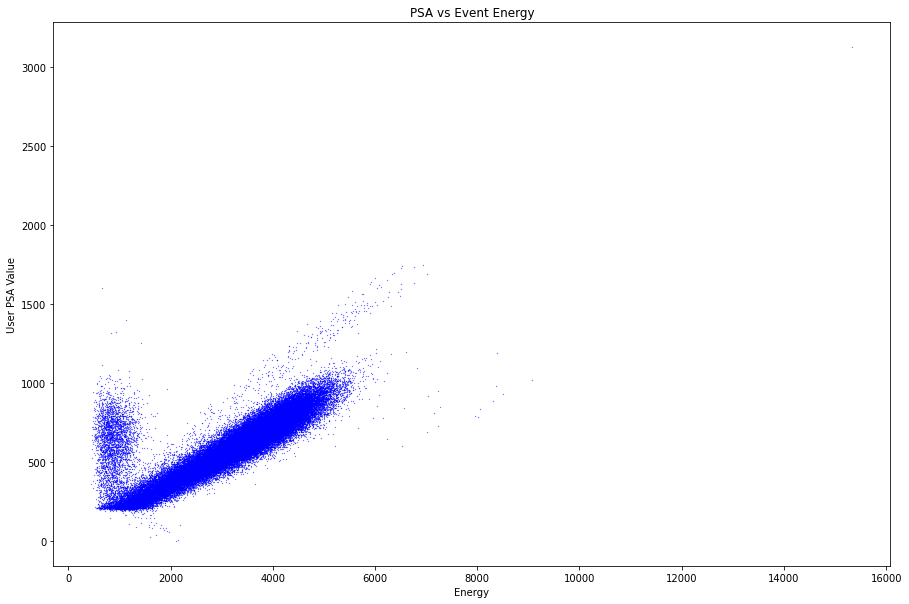

In [11]:
plt.figure(figsize=(15,10))
plt.scatter(energy, userPsaValue, marker='o', s=0.05, color='b')
plt.xlabel('Energy')
plt.ylabel('User PSA Value')
plt.title('PSA vs Event Energy')
plt.show()

In [22]:
# Convert lists to awkward arrays
evtPattern_ak       = ak.Array(evtPattern)
evtInfo_ak          = ak.Array(evtInfo)
numTraceBlks_ak     = ak.Array(numTraceBlks)
numTraceBlksPrev_ak = ak.Array(numTraceBlksPrev)
trigTimeLo_ak       = ak.Array(trigTimeLo)
trigTimeMi_ak       = ak.Array(trigTimeMi)
trigTimeHi_ak       = ak.Array(trigTimeHi)
energy_ak           = ak.Array(energy)
chanNo_ak           = ak.Array(chanNo)
userPsaValue_ak     = ak.Array(userPsaValue)
xiaPsaValue_ak      = ak.Array(xiaPsaValue)

In [ ]:
# Stack energy and userPsaValue for clustering
data = np.stack((energy, userPsaValue), axis=1)

# Use DBSCAN to identify clusters
db = DBSCAN(eps=400, min_samples=100).fit(data)
labels = db.labels_

# Get unique labels (clusters)
unique_labels = set(labels)

plt.figure(figsize=(15,10))

# Plotting the data points and calculating slopes
for label in unique_labels:
    if label == -1:
        # Noise points
        continue

    # Filter points by cluster label
    cluster_points = data[labels == label]
    energy_cluster = cluster_points[:, 0]
    userPsaValue_cluster = cluster_points[:, 1]

    # Fit a linear model to the cluster
    model = LinearRegression().fit(energy_cluster.reshape(-1, 1), userPsaValue_cluster)
    slope = model.coef_[0]
    intercept = model.intercept_

    # Generate line for the fitted model
    line_x = np.linspace(min(energy_cluster), max(energy_cluster), 100)
    line_y = slope * line_x + intercept

    # Plot cluster points
    plt.scatter(energy_cluster, userPsaValue_cluster, s=0.5)

    # Plot fitted line
    plt.plot(line_x, line_y)

plt.xlabel('Energy')
plt.ylabel('User PSA Value')
plt.title('PSA vs Event Energy with Linear Fits')
plt.legend()
plt.show()